Sun, Keanna Louie

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# %matplotlib inline

In [55]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [56]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


In [57]:
data.columns

Index(['Unnamed: 0', 'movie_title', 'color', 'director_name',
       'num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

First, drop the Unnamed: 0 column

In [58]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [59]:
data

,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,0.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,0.0,...,359.0,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0
5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,0.0,...,3.0,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0
5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,...,9.0,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0
5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [60]:
# removed the first one bcos director is 0
top10_directors = data.groupby('director_name', as_index=False).count().sort_values(
                            by='movie_title', ascending=False)[['director_name', 'movie_title']][1:11]  
top10_directors

,director_name,movie_title
2159,Steven Spielberg,26
2378,Woody Allen,22
392,Clint Eastwood,20
1478,Martin Scorsese,20
1903,Ridley Scott,17
2158,Steven Soderbergh,16
2102,Spike Lee,16
2221,Tim Burton,16
1862,Renny Harlin,15
1701,Oliver Stone,14


In [61]:
director_gross_earnings = data.groupby('director_name', as_index=False).sum()[['director_name', 'gross']]
director_gross_earnings

,director_name,gross
0,0,1039304.0
1,A. Raven Cruz,0.0
2,Aaron Hann,0.0
3,Aaron Schneider,9176553.0
4,Aaron Seltzer,48546578.0
...,...,...
2395,Zoran Lisinac,0.0
2396,Álex de la Iglesia,3607.0
2397,Émile Gaudreault,6239558.0
2398,Éric Tessier,0.0


In [62]:
top10director_gross = pd.merge(top10_directors, director_gross_earnings, 
                               on='director_name').sort_values("gross", ascending=False)
top10director_gross.drop('movie_title', inplace=True, axis=1)
top10director_gross

,director_name,gross
0,Steven Spielberg,4.114233e+09
7,Tim Burton,2.071275e+09
2,Clint Eastwood,1.378321e+09
4,Ridley Scott,1.337772e+09
5,Steven Soderbergh,1.050730e+09
3,Martin Scorsese,9.202871e+08
9,Oliver Stone,6.797927e+08
8,Renny Harlin,5.239759e+08
6,Spike Lee,3.285004e+08
1,Woody Allen,3.083454e+08


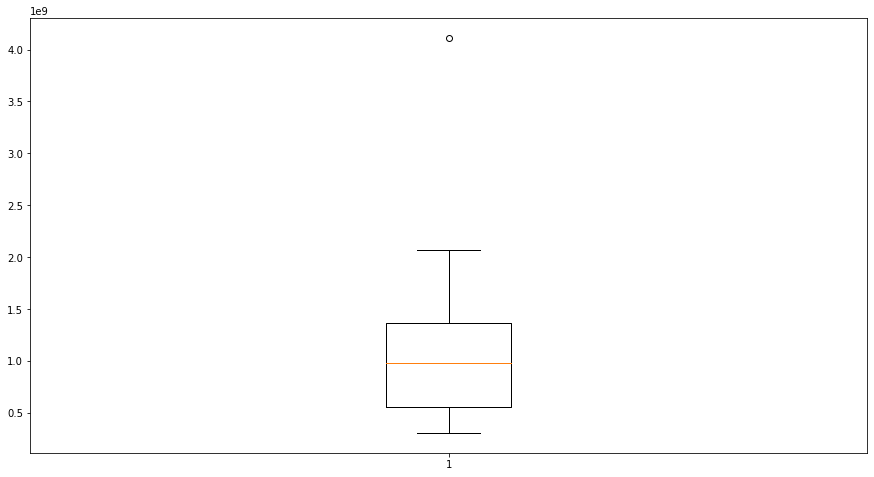

In [63]:
plt.figure(figsize=(15,8))
plt.boxplot(top10director_gross['gross'])
plt.show()

Steven Spielberg's gross earnings are considered as an outlier. The median gross eanrings is around 100,000,000.

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

IMDB score will act as the x-axis

Average number of critics as y-axis

Average gross will be a line plot

In [64]:
data1 = data.groupby("imdb_score").mean()
data1[['gross', 'num_critic_for_reviews']]

,gross,num_critic_for_reviews
imdb_score,,
0.0,0.000000e+00,0.000000
1.6,7.300094e+07,84.000000
1.7,0.000000e+00,12.000000
1.9,7.761325e+06,48.666667
2.0,2.847154e+06,16.000000
...,...,...
9.0,1.968720e+08,282.666667
9.1,2.980620e+05,36.000000
9.2,1.348220e+08,208.000000


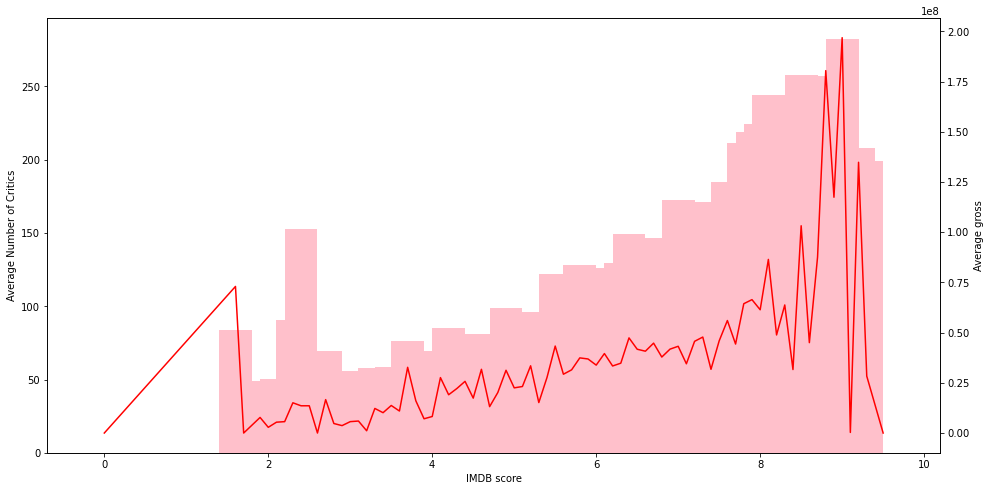

In [65]:
plt.figure(figsize=(16, 8))
plt.bar(data1.index, data1.num_critic_for_reviews, width=0.4, color='pink' )
plt.xlabel("IMDB score")
plt.ylabel("Average Number of Critics")

ave_gross = plt.twinx()
ave_gross.plot(data1['gross'], color='red')
ave_gross.set_ylabel('Average gross')
plt.show()

The graph indicates that in general, the higher IMDB score, the higher number of critics for review and higher gross earnings. Although there are some data that doesn't follow this trend such as movies that scored around an IMDB score of 2.5 that had over 150 critics. 

## Compute Sales (Gross - Budget), add it as another column

In [66]:
data['sales'] = data.apply(lambda x: x.gross - x.budget, axis=1)

In [67]:
data

,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,0.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,0.0,...,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0
5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,0.0,...,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0
5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,...,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0
5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,...,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0


## Which directors garnered the most total sales?

In [68]:
most_sales = data.groupby("director_name", as_index=False).sum().sort_values(by='sales', ascending=False)
most_sales[['director_name', 'sales']][:11]

,director_name,sales
2159,Steven Spielberg,2.451332e+09
765,George Lucas,1.386641e+09
923,James Cameron,1.199626e+09
1219,Joss Whedon,1.000887e+09
335,Chris Columbus,9.417076e+08
1787,Peter Jackson,9.009693e+08
2221,Tim Burton,8.242755e+08
374,Christopher Nolan,8.082276e+08
1158,Jon Favreau,7.693815e+08
695,Francis Lawrence,7.555020e+08


Steven Spielberg is the director who has garnered the most sales.

## Plot sales and average likes as a scatterplot. Fit it with a line.

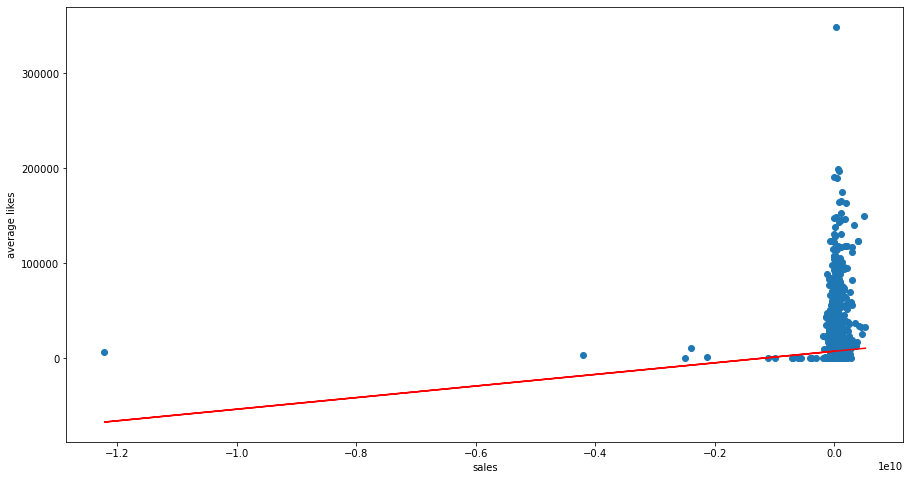

In [69]:
plt.figure(figsize=(15,8))

# using polyfit method to find m and b in y = mx + b
theta = np.polyfit(data['sales'], data['movie_facebook_likes'], 1)

# line of best fit: y = mx + b
y_line = theta[1] + theta[0] * data['sales']

plt.xlabel("sales")
plt.ylabel("average likes")
plt.scatter(data['sales'], data['movie_facebook_likes'])
plt.plot(data['sales'], y_line, 'r')
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

Since a movie can have many genres, any movie that has romance, comedy, action or fantasy will be categorized under that genre. It is also possible that a movie can be romance and comedy at the same time, but for the sake of simplicity, romance will take precedence over all genres (so if a movie has romance in its genres, it will be categorized as romance). 

Hierarchy:
1. Romance
2. Comedy
3. Action
4. Fantasy

In [70]:
def categorize(genre_string):
    if "Romance" in genre_string:
        return "Romance"
    elif "Comedy" in genre_string:
        return "Comedy"
    elif "Action" in genre_string:
        return "Action"
    elif "Fantasy" in genre_string:
        return "Fantasy"
    else:
        return "NA"

In [71]:
data['category'] = data['genres'].apply(categorize)

In [72]:
data

,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,category
0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,Action
1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,Action
2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,Action
3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,Action
4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,0.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,0.0,...,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0,NA
5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,0.0,...,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0,NA
5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,...,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0,Romance
5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,...,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0,NA


The dataframe below shows how many movies are under each category.

In [73]:
genre_sales = data.groupby("category", as_index=False).count()[['category', 'sales']]
genre_sales

,category,sales
0,Action,822
1,Comedy,1283
2,Fantasy,175
3,NA,1656
4,Romance,1108


In [74]:
romance = data[data.category == "Romance"]["sales"]
comedy = data[data.category == "Comedy"]["sales"]
action = data[data.category == "Action"]["sales"]
fantasy = data[data.category == "Fantasy"]["sales"]

Text(0.5, 1.0, 'Sales of Each Genre')

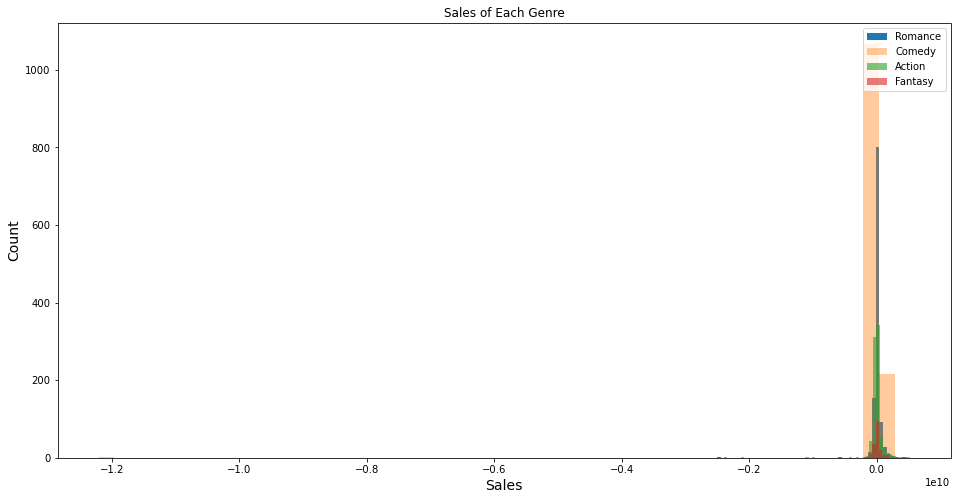

In [75]:
plt.figure(figsize=(16,8))
plt.hist(romance, bins=50, alpha=1, label="Romance")
plt.hist(comedy, bins=50, alpha=0.4, label="Comedy")
plt.hist(action, bins=50, alpha=0.6, label="Action")
plt.hist(fantasy, bins=50, alpha=0.6, label="Fantasy")
plt.xlabel("Sales", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
plt.title("Sales of Each Genre")

The plots are concentrated mostly on the right side because most movies typically make positive sales, but there are some movies that have made negative sales, which is why the graph is also showing the negative x-axis.

Based on the graph, comedy and romance movies seem to be the most profitable as their plots mostly lay on the positive x-axis.

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [76]:
data['average_actor_likes'] = data[['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']].mean(axis=1)
data

,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,category,average_actor_likes
0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,Action,930.333333
1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,Action,15333.333333
2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,Action,3851.333333
3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,Action,24333.333333
4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,0.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,NA,47.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,0.0,...,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0,NA,584.333333
5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,0.0,...,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0,NA,0.000000
5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,...,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0,Romance,718.000000
5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,...,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0,NA,41.666667


## Copying the whole dataframe

In [77]:
df = data.copy()
df.head()

,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,category,average_actor_likes
0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,Action,930.333333
1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,Action,15333.333333
2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,Action,3851.333333
3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,Action,24333.333333
4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,0.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,NA,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [78]:
data.dtypes

movie_title                   object
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
num_voted_users              float64
cast_total_facebook_likes    float64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [79]:
df_float_cols = df.select_dtypes(include=[np.float64])
df_float_cols

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204.0,4834.0,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220.0,48350.0,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868.0,11700.0,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337.0,106759.0,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,0.0,0.0,131.0,0.0,131.0,0.0,8.0,143.0,0.0,0.0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,43.0,43.0,0.0,319.0,841.0,0.0,73839.0,1753.0,1.0,359.0,0.0,0.0,593.0,7.5,16.00,32000.0,0.0,584.333333
5040,13.0,76.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0,3.0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0,0.000000
5041,14.0,100.0,0.0,489.0,946.0,10443.0,1255.0,2386.0,5.0,9.0,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0,718.000000
5042,43.0,90.0,16.0,16.0,86.0,85222.0,4285.0,163.0,0.0,84.0,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0,41.666667


In [80]:
for column in data.columns:
    if column in df_float_cols.columns:
        df[column] = (df_float_cols[column] - df_float_cols[column].min()) / (df_float_cols[column].max() - df_float_cols[column].min())

In [81]:
df

,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,category,average_actor_likes
0,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,1.000000,...,PG-13,1.940158e-02,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,Action,0.004261
1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,0.406840,...,PG-13,2.455896e-02,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,Action,0.070229
2,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,0.263080,...,PG-13,2.005649e-02,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,Action,0.017640
3,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,0.589253,...,PG-13,2.046580e-02,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,Action,0.111450
4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,0.000000,...,0,0.000000e+00,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,NA,0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,b'The Following ',Color,0,0.052891,0.227513,0.000000,0.013870,Valorie Curry,0.001314,0.000000,...,TV-14,0.000000e+00,0.000000,0.004328,0.789474,1.000000,0.091691,0.958898,NA,0.002676
5040,b'A Plague So Pleasant',Color,Benjamin Roberds,0.015990,0.402116,0.000000,0.000000,Maxwell Moody,0.000000,0.000000,...,0,1.146085e-07,0.998512,0.000000,0.663158,0.000000,0.000046,0.958898,NA,0.000000
5041,b'Shanghai Calling',Color,Daniel Hsia,0.017220,0.529101,0.000000,0.021261,Daniel Henney,0.001478,0.000014,...,PG-13,0.000000e+00,0.998016,0.005248,0.663158,0.146875,0.001891,0.958899,Romance,0.003289
5042,b'My Date with Drew',Color,Jon Gunn,0.052891,0.476190,0.000696,0.000696,Brian Herzlinger,0.000134,0.000112,...,PG,9.004953e-08,0.994048,0.000168,0.694737,0.115625,0.001307,0.958905,NA,0.000191
